PULIZIA DEL DATA SET 

In [2]:
import numpy as np
import pandas as pd 
import re


df = pd.read_csv("CarsDatasets2025.csv", encoding='latin-1')
df.head()

,Company Names,Cars Names,Engines,CC/Battery Capacity,HorsePower,Total Speed,Performance(0 - 100 )KM/H,Cars Prices,Fuel Types,Seats,Torque
0,FERRARI,SF90 STRADALE,V8,3990 cc,963 hp,340 km/h,2.5 sec,"$1,100,000",plug in hyrbrid,2,800 Nm
1,ROLLS ROYCE,PHANTOM,V12,6749 cc,563 hp,250 km/h,5.3 sec,"$460,000",Petrol,5,900 Nm
2,Ford,KA+,1.2L Petrol,"1,200 cc",70-85 hp,165 km/h,10.5 sec,"$12,000-$15,000",Petrol,5,100 - 140 Nm
3,MERCEDES,GT 63 S,V8,"3,982 cc",630 hp,250 km/h,3.2 sec,"$161,000",Petrol,4,900 Nm
4,AUDI,AUDI R8 Gt,V10,"5,204 cc",602 hp,320 km/h,3.6 sec,"$253,290",Petrol,2,560 Nm


SHAPE

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1218 entries, 0 to 1217
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Company Names              1218 non-null   object
 1   Cars Names                 1218 non-null   object
 2   Engines                    1218 non-null   object
 3   CC/Battery Capacity        1215 non-null   object
 4   HorsePower                 1218 non-null   object
 5   Total Speed                1218 non-null   object
 6   Performance(0 - 100 )KM/H  1212 non-null   object
 7   Cars Prices                1218 non-null   object
 8   Fuel Types                 1218 non-null   object
 9   Seats                      1218 non-null   object
 10  Torque                     1217 non-null   object
dtypes: object(11)
memory usage: 104.8+ KB


In [5]:
df.shape

(1218, 11)

In [6]:
df.columns

Index(['Company Names', 'Cars Names', 'Engines', 'CC/Battery Capacity',
       'HorsePower', 'Total Speed', 'Performance(0 - 100 )KM/H', 'Cars Prices',
       'Fuel Types', 'Seats', 'Torque'],
      dtype='object')

In [7]:
df.rename(columns={'CC/Battery Capacity':'battery_capacity','Performance(0 - 100 )KM/H':'performance'}, inplace=True)

In [8]:
df.columns = df.columns.str.strip().str.lower().str.replace(" ", "_")
df.columns

Index(['company_names', 'cars_names', 'engines', 'battery_capacity',
       'horsepower', 'total_speed', 'performance', 'cars_prices', 'fuel_types',
       'seats', 'torque'],
      dtype='object')

In [9]:
df = df.drop_duplicates()
df.shape

(1214, 11)

In [ ]:
# Strip extra spaces
for col in df.select_dtypes(include="object").columns:
    df[col] = df[col].str.strip()

In [11]:
# Handle ranges
def handle_range(val):
    if pd.isna(val):
        return np.nan
    s = str(val).replace(",", "")
    nums = re.findall(r"\d+\.?\d*", s)
    if len(nums) == 0:
        return np.nan
    nums = list(map(float, nums))
    return np.mean(nums)

In [12]:
df["battery_capacity"] = df["battery_capacity"].astype(str).str.replace("cc","", regex=False)
df["battery_capacity"] = df["battery_capacity"].apply(handle_range)

df["horsepower"] = df["horsepower"].astype(str).str.replace("hp","", regex=False)
df["horsepower"] = df["horsepower"].apply(handle_range)

df["total_speed"] = df["total_speed"].astype(str).str.replace("km/h","", regex=False)
df["total_speed"] = df["total_speed"].apply(handle_range)

df["performance"] = df["performance"].astype(str).str.replace("sec","", regex=False)
df["performance"] = df["performance"].apply(handle_range)

df["cars_prices"] = df["cars_prices"].astype(str).str.replace("USD","", regex=False).str.replace("usd","", regex=False).str.replace("$", "", regex=False)
df["cars_prices"] = df["cars_prices"].apply(handle_range)

df["torque"] = df["torque"].astype(str).str.replace("Nm","", regex=False)
df["torque"] = df["torque"].apply(handle_range)

df = df.reset_index(drop=True)

df.to_csv("cars_dataset_2025_cleaned.csv", index=False)

print("cars_dataset_2025_cleaned.csv")
df.head()

cars_dataset_2025_cleaned.csv


,company_names,cars_names,engines,battery_capacity,horsepower,total_speed,performance,cars_prices,fuel_types,seats,torque
0,FERRARI,SF90 STRADALE,V8,3990.0,963.0,340.0,2.5,1100000.0,plug in hyrbrid,2,800.0
1,ROLLS ROYCE,PHANTOM,V12,6749.0,563.0,250.0,5.3,460000.0,Petrol,5,900.0
2,Ford,KA+,1.2L Petrol,1200.0,77.5,165.0,10.5,13500.0,Petrol,5,120.0
3,MERCEDES,GT 63 S,V8,3982.0,630.0,250.0,3.2,161000.0,Petrol,4,900.0
4,AUDI,AUDI R8 Gt,V10,5204.0,602.0,320.0,3.6,253290.0,Petrol,2,560.0


In [13]:
import pandas as pd

# Copia di sicurezza
df["Fuel Types Raw"] = df["fuel_types"]

def clean_fuel_type(fuel):
    if pd.isna(fuel):
        return "Unknown"

    fuel = fuel.strip().lower()

    # --- Electric ---
    if "electric" in fuel and "hybrid" not in fuel:
        return "Electric"

    # --- Hydrogen ---
    if "hydrogen" in fuel:
        return "Hydrogen"

    # --- CNG ---
    if "cng" in fuel:
        return "CNG"

    # --- Plug-in Hybrid ---
    if ("plug" in fuel) or ("plug-in" in fuel) or ("plug in" in fuel):
        return "Plug-in Hybrid"

    # --- Hybrid generico ---
    if "hybrid" in fuel or "ev" in fuel:  
        return "Hybrid"

    # --- Petrol ---
    if "petrol" in fuel or "gasoline" in fuel:
        return "Petrol"

    # --- Diesel ---
    if "diesel" in fuel:
        return "Diesel"

    return "Other"

# Applica la pulizia
df["fuel_types"] = df["fuel_types"].apply(clean_fuel_type)

# Mostra i nuovi valori unici
print("Valori unici puliti:")
print(df["fuel_types"].unique())

# Conta le categorie
print("\nConteggio categorie:")
print(df["fuel_types"].value_counts())


Valori unici puliti:
['Plug-in Hybrid' 'Petrol' 'Diesel' 'Hybrid' 'Electric' 'Hydrogen' 'CNG']

Conteggio categorie:
fuel_types
Petrol            894
Hybrid            107
Diesel            106
Electric           96
Plug-in Hybrid      7
Hydrogen            3
CNG                 1
Name: count, dtype: int64


In [14]:
df.head()

,company_names,cars_names,engines,battery_capacity,horsepower,total_speed,performance,cars_prices,fuel_types,seats,torque,Fuel Types Raw
0,FERRARI,SF90 STRADALE,V8,3990.0,963.0,340.0,2.5,1100000.0,Plug-in Hybrid,2,800.0,plug in hyrbrid
1,ROLLS ROYCE,PHANTOM,V12,6749.0,563.0,250.0,5.3,460000.0,Petrol,5,900.0,Petrol
2,Ford,KA+,1.2L Petrol,1200.0,77.5,165.0,10.5,13500.0,Petrol,5,120.0,Petrol
3,MERCEDES,GT 63 S,V8,3982.0,630.0,250.0,3.2,161000.0,Petrol,4,900.0,Petrol
4,AUDI,AUDI R8 Gt,V10,5204.0,602.0,320.0,3.6,253290.0,Petrol,2,560.0,Petrol


In [ ]:
import pandas as pd
import numpy as np
import re
df[df['horsepower'].astype(str).str.contains(r'\d+\D+\d+', regex=True)]

def fix_horsepower(value):
    if isinstance(value, str):
        # Estrae tutti i numeri presenti nella stringa
        numbers = re.findall(r'\d+', value)
        
        if len(numbers) == 2:
            # Caso tipo "70-80": prendo la media
            return (int(numbers[0]) + int(numbers[1])) / 2
        elif len(numbers) == 1:
            # Caso semplice: "90"
            return int(numbers[0])
        else:
            return np.nan
    
    # Se non è una stringa (magari già numero), lo ritorno così com'è
    return value

# Applico la funzione
df['horsepower'] = df['horsepower'].apply(fix_horsepower)

# Conversione finale a numerico
df['horsepower'] = pd.to_numeric(df['horsepower'], errors='coerce')
df['horsepower'].dtype
df[df['horsepower'].apply(lambda x: isinstance(x, str))]
df[df['horsepower'].astype(str).str.contains(r'\d+\D+\d+', regex=True)]
df['horsepower'].apply(type).value_counts()
# Calcola IQR per identificare outlier
Q1 = df['horsepower'].quantile(0.25)
Q3 = df['horsepower'].quantile(0.75)
IQR = Q3 - Q1

# Definisci outlier
outliers = df[(df['horsepower'] < Q1 - 1.5*IQR) | (df['horsepower'] > Q3 + 1.5*IQR)]

# Mostra tutte le righe sospette ordinate per horsepower decrescente
print("Righe sospette di horsepower:")
print(outliers.sort_values('horsepower', ascending=False))

# Sostituisci gli outlier con NaN
df.loc[outliers.index, 'horsepower'] = np.nan

# Verifica che gli outlier siano stati sostituiti
print("\nDopo la sostituzione:")
print(df['horsepower'].describe())
df[df['company_names'].str.contains("Bugatti", case=False, na=False)][['company_names','cars_names','horsepower']]


Righe sospette di horsepower:
   company_names    cars_names engines  battery_capacity  horsepower  \
46   LAMBORGHINI  AVENTADOR SV     V12            6498.0       740.0   
51   LAMBORGHINI   AVENTADOR S     V12            6498.0       740.0   

    total_speed  performance  cars_prices fuel_types seats  torque  \
46        350.0          2.8     493000.0     Petrol     2   690.0   
51        350.0          2.9     421000.0     Petrol     2   690.0   

   Fuel Types Raw  
46         Petrol  
51         Petrol  

Dopo la sostituzione:
count    1172.000000
mean      280.924488
std       157.693223
min        26.000000
25%       150.000000
50%       248.000000
75%       381.250000
max       728.000000
Name: horsepower, dtype: float64


KeyError: 'Horsepower Raw'

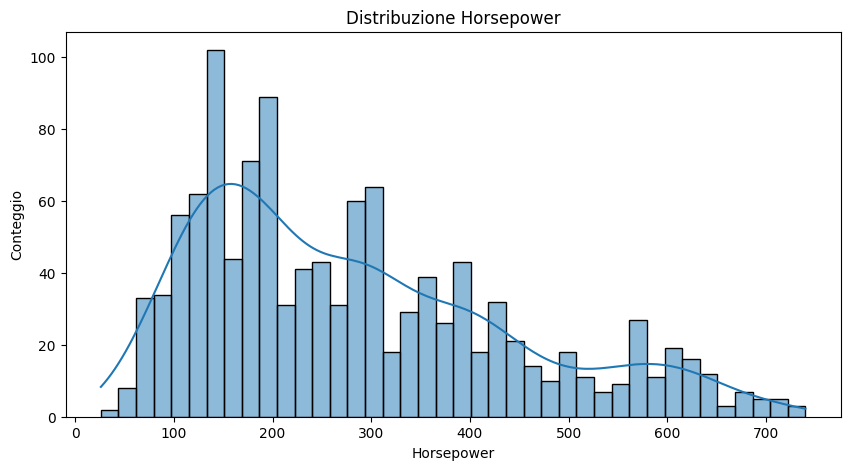

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,5))
sns.histplot(df['horsepower'], bins=40, kde=True)
plt.title("Distribuzione Horsepower")
plt.xlabel("Horsepower")
plt.ylabel("Conteggio")
plt.show()

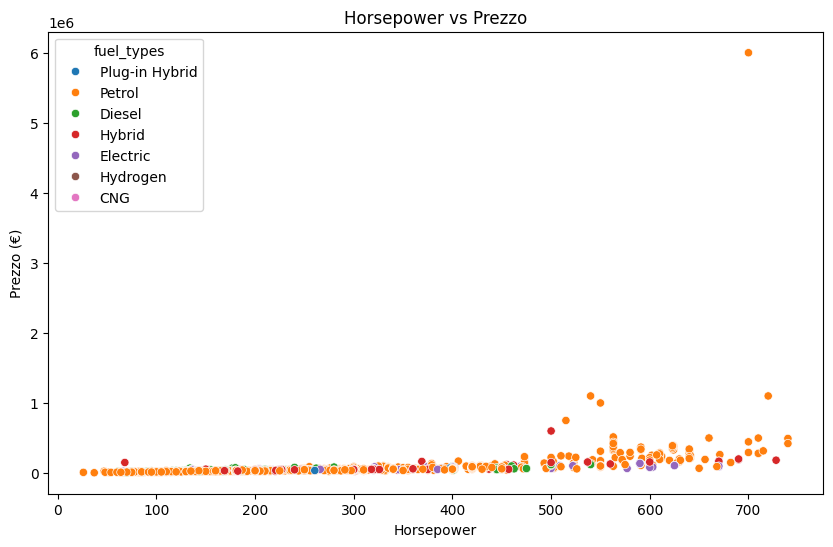

In [ ]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x='horsepower', y='cars_prices', hue='fuel_types')
plt.title("Horsepower vs Prezzo")
plt.xlabel("Horsepower")
plt.ylabel("Prezzo (€)")
plt.show()


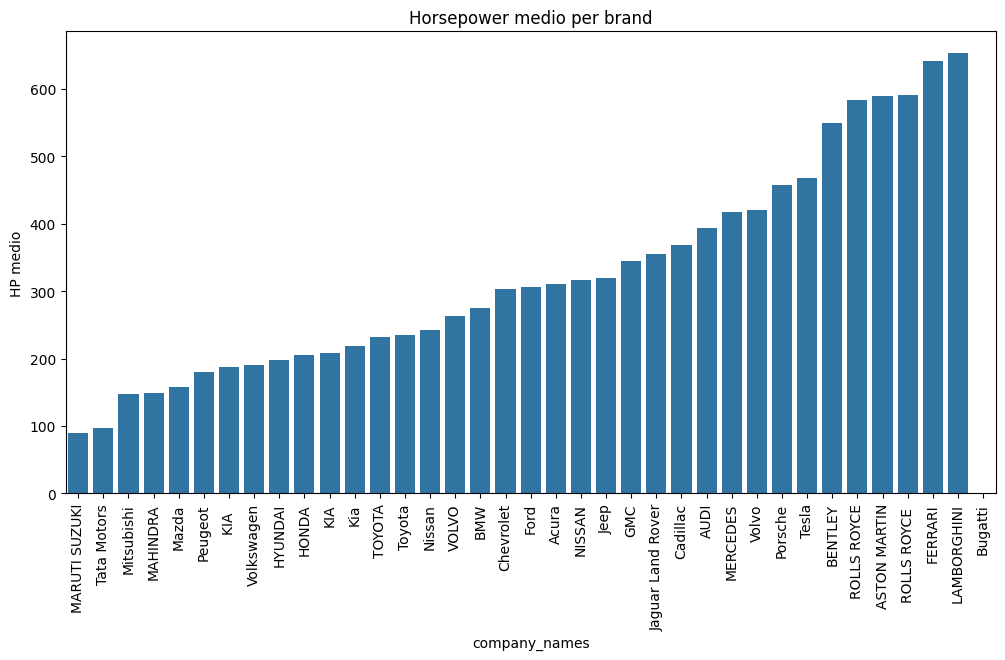

In [ ]:
plt.figure(figsize=(12,6))
brand_hp = df.groupby('company_names')['horsepower'].mean().sort_values()

sns.barplot(x=brand_hp.index, y=brand_hp.values)
plt.xticks(rotation=90)
plt.title("Horsepower medio per brand")
plt.ylabel("HP medio")
plt.show()
